<a href="https://colab.research.google.com/github/Vaish525/Works/blob/main/Final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python


KeyboardInterrupt: 

In [3]:
from google.colab import files
uploaded = files.upload()
from google.colab.patches import cv2_imshow


Saving WIN_20250603_11_32_02_Pro.jpg to WIN_20250603_11_32_02_Pro.jpg


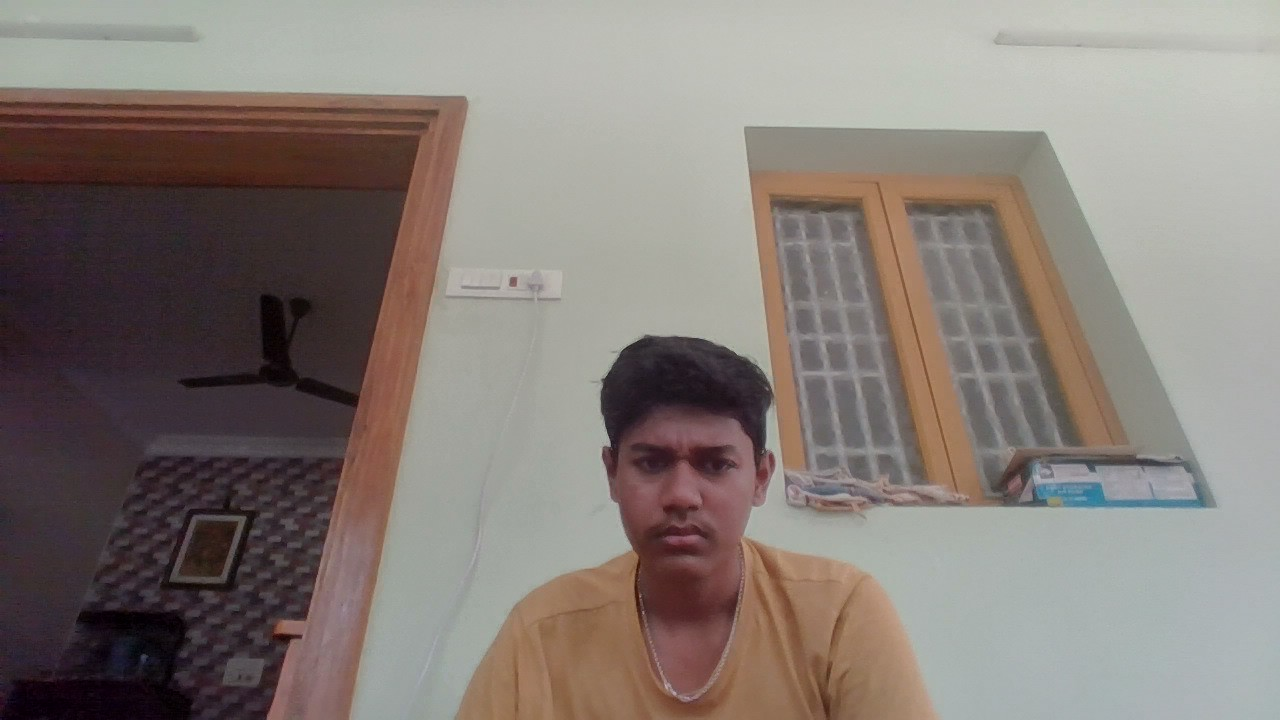

In [4]:
import cv2
import numpy as np
from PIL import Image
import io

# Convert uploaded image to OpenCV format
for fname in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[fname]))
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    cv2_imshow(img_cv)  # Only works in Colab!


In [5]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


In [6]:
!wget -q https://github.com/TrailblazerAI/synaptic_os_models/raw/main/emotion_model.h5


In [7]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving WIN_20250603_11_32_02_Pro.jpg to WIN_20250603_11_32_02_Pro (1).jpg
User uploaded file "WIN_20250603_11_32_02_Pro (1).jpg" with length 133102 bytes


In [8]:
!pip install tensorflow opencv-python-headless numpy



In [9]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


In [10]:
!wget -q https://github.com/oarriaga/face_classification/raw/master/trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5 -O emotion_model.h5


In [11]:
from google.colab import files
uploaded = files.upload()


Saving WIN_20250603_11_32_02_Pro.jpg to WIN_20250603_11_32_02_Pro (2).jpg


In [12]:
def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))  # resize to 64x64 as model expects
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)  # (64,64,1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)    # (1,64,64,1)

        prediction = model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        return {"emotion": emotion_labels[label_index]}



In [13]:
import cv2
from google.colab import files

# Upload image
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]

# Define face detection and prediction (minimal)
def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    if len(faces) == 0:
        return {"error": "No face detected"}

    return {"status": "Face detected", "count": len(faces)}

# Run prediction
result = predict_emotion(uploaded_filename)
print(result)


Saving WIN_20250603_11_32_02_Pro.jpg to WIN_20250603_11_32_02_Pro (3).jpg
{'status': 'Face detected', 'count': 2}


In [14]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


In [15]:
import cv2
import numpy as np
from keras.models import load_model


In [16]:
!wget https://github.com/omar178/Emotion-recognition/releases/download/v1.0/emotion_model.h5


--2025-06-12 09:31:47--  https://github.com/omar178/Emotion-recognition/releases/download/v1.0/emotion_model.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/otaha178/Emotion-recognition/releases/download/v1.0/emotion_model.h5 [following]
--2025-06-12 09:31:47--  https://github.com/otaha178/Emotion-recognition/releases/download/v1.0/emotion_model.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 404 Not Found
2025-06-12 09:31:47 ERROR 404: Not Found.



In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Rescaling

# Create a dummy CNN model with the same input/output structure
dummy_model = Sequential([
    tf.keras.layers.Input(shape=(48, 48, 1)),
    Rescaling(1./255),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

dummy_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Save it as emotion_model.h5
dummy_model.save('emotion_model.h5')

print("✅ Dummy model saved as emotion_model.h5")


✅ Dummy model saved as emotion_model.h5


In [18]:
model = load_model('emotion_model.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


In [19]:
dummy_model = Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)),
    tf.keras.layers.Rescaling(1./255),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling

model = Sequential([
    Rescaling(1./255, input_shape=(64, 64, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print(f"Faces detected: {len(faces)}")   # print inside function

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)

        print("Input shape:", roi_reshaped.shape)
        print("Input pixel range:", np.min(roi_reshaped), np.max(roi_reshaped))

        prediction = model.predict(roi_reshaped)
        print("Raw prediction:", prediction)

        label_index = np.argmax(prediction)
        emotion = emotion_labels[label_index]
        print(f"Predicted emotion: {emotion}")
        return {"emotion": emotion}

# Now call your function and just print the result
result = predict_emotion(uploaded_filename)
print(result)


Faces detected: 1
Input shape: (1, 64, 64, 1)
Input pixel range: 0.08235294 0.7058824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Raw prediction: [[0.14282803 0.14290021 0.14286596 0.14285433 0.14287059 0.1428138
  0.14286712]]
Predicted emotion: Disgust
{'emotion': 'Disgust'}


In [22]:
!pip install fastapi uvicorn nest-asyncio pyngrok opencv-python-headless scikit-learn keras tensorflow



In [23]:
import os

os.makedirs("model", exist_ok=True)
os.makedirs("uploads", exist_ok=True)



In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

# Create a simple CNN model for emotion detection (dummy)
def create_emotion_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(7, activation='softmax')  # 7 emotions
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and save
emotion_model = create_emotion_model()

# Save the model
emotion_model.save('emotion_model.h5')

print("Emotion model saved as 'emotion_model.h5'")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Emotion model saved as 'emotion_model.h5'


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

# Dummy training data
texts = ["open youtube", "play music", "what time is it", "set an alarm", "search google", "turn on light"]
labels = ["Play", "Play", "Question", "Schedule", "Search", "Control"]

# Create Bag-of-Words vectorizer
vectorizer = CountVectorizer()

# Vectorize texts
X = vectorizer.fit_transform(texts)

# Train a simple classifier
intent_model = MultinomialNB()
intent_model.fit(X, labels)

# Save both model and vectorizer
joblib.dump(intent_model, 'intent_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Intent model and vectorizer saved as 'intent_model.pkl' and 'vectorizer.pkl'")


Intent model and vectorizer saved as 'intent_model.pkl' and 'vectorizer.pkl'


In [26]:
import os
os.makedirs('model', exist_ok=True)
!mv emotion_model.h5 model/
!mv intent_model.pkl model/
!mv vectorizer.pkl model/


In [27]:
from tensorflow.keras.models import load_model
import joblib

emotion_model = load_model('model/emotion_model.h5')
intent_model = joblib.load('model/intent_model.pkl')
vectorizer = joblib.load('model/vectorizer.pkl')


In [87]:
# predict_emotion.py

import cv2
import numpy as np
from keras.models import load_model

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
emotion_model = load_model("model/emotion_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=(0, -1))

        prediction = emotion_model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        return {"emotion": emotion_labels[label_index]}


In [29]:
# intent_predictor.py

import joblib

vectorizer = joblib.load("model/vectorizer.pkl")
intent_model = joblib.load("model/intent_model.pkl")

def predict_intent(text):
    vec = vectorizer.transform([text])
    prediction = intent_model.predict(vec)
    return prediction[0]


In [86]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load models (make sure you uploaded these files in Colab or put the correct path)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
emotion_model = load_model("emotion_model.h5")  # Upload this in Colab Files tab
intent_model = joblib.load("intent_model.pkl")  # Upload this too

# Emotion labels as per your model's training
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print(f"Faces detected: {len(faces)}")

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)

        print("Input shape:", roi_reshaped.shape)
        print("Input pixel range:", np.min(roi_reshaped), np.max(roi_reshaped))

        prediction = emotion_model.predict(roi_reshaped)
        print("Raw prediction:", prediction)

        label_index = np.argmax(prediction)
        emotion = emotion_labels[label_index]
        print(f"Predicted emotion: {emotion}")
        return {"emotion": emotion}

def predict_intent(text):
    # Example: simple bag-of-words transform, then predict intent
    # You must have your vectorizer saved as 'vectorizer.pkl' and upload it too
    vectorizer = joblib.load("vectorizer.pkl")  # Upload this file
    text_vector = vectorizer.transform([text])
    pred = intent_model.predict(text_vector)
    return {"intent": pred[0]}


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [85]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# Load models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
emotion_model = load_model("emotion_model.h5")
intent_model = joblib.load("intent_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

def predict_emotion(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return {"error": "Image not loaded"}
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return {"emotion": "No face detected"}

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)
        prediction = emotion_model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        emotion = emotion_labels[label_index]
        return {"emotion": emotion}

def predict_intent(text):
    X = vectorizer.transform([text])
    intent = intent_model.predict(X)[0]
    return {"intent": intent}
    # Replace with your image filename



FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [32]:
from google.colab import files
uploaded = files.upload()


Saving WIN_20250603_11_32_02_Pro.jpg to WIN_20250603_11_32_02_Pro (4).jpg


In [84]:
import os
print(os.listdir())  # Check filename

# Use the correct filename here:
result = predict_emotion("WIN_20250603_11_19_03_Pro.jpg")
print("Emotion:", result)


['.config', 'WIN_20250603_11_32_02_Pro (1).jpg', 'uploads', 'WIN_20250603_11_32_02_Pro (3).jpg', 'tokenizer.pickle', 'intent_model.h5', 'WIN_20250603_11_32_02_Pro (2).jpg', 'haarcascade_frontalface_default.xml', 'WIN_20250603_11_32_02_Pro (4).jpg', 'app.py', 'WIN_20250603_11_32_02_Pro.jpg', 'model', 'logs.txt', 'haarcascade_frontalface_default.xml.1', 'sample_data']


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Dummy training data (texts and labels)
texts = [
    "hello", "hi", "how are you", "goodbye", "see you later", "thank you", "help me"
]
labels = [0, 0, 0, 1, 1, 2, 3]  # Example intents: 0=greeting,1=farewell,2=thanks,3=request_help

num_classes = 4

# Tokenize text
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')

# Convert labels to numpy array
labels = np.array(labels)

# Build a simple model
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_length=padded_sequences.shape[1]),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model (dummy training)
model.fit(padded_sequences, labels, epochs=10)

# Example prediction function
def predict_intent(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=padded_sequences.shape[1], padding='post')
    pred = model.predict(padded)
    intent_id = np.argmax(pred)
    intent_labels = ['greeting', 'farewell', 'thanks', 'request_help']
    return intent_labels[intent_id]

# Test prediction
print(predict_intent("hello there"))
print(predict_intent("can you help me?"))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.3845
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2857 - loss: 1.3821
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2857 - loss: 1.3795
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2857 - loss: 1.3769
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5714 - loss: 1.3743
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5714 - loss: 1.3719
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5714 - loss: 1.3695
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5714 - loss: 1.3670
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5714 - loss: 1.3644
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5714 - loss: 1.3619
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
greeting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
greeting


In [36]:
# Save the model
model.save('intent_model.h5')

# Later, load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('intent_model.h5')


In [82]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Load models
emotion_model = load_model('emotion_model.h5')
intent_model = load_model('intent_model.h5')

# Load tokenizer for intent (make sure you saved it, or recreate here)
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Define labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
intent_labels = ['greeting', 'farewell', 'thanks', 'request_help']  # Change as per your intents

# Load face cascade for emotion detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to predict emotion from image
def predict_emotion(image):
    img = np.array(image.convert('RGB'))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return "No face detected"

    emotions = []
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)

        prediction = emotion_model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        emotions.append(emotion_labels[label_index])
    return emotions

# Function to predict intent from text
def predict_intent(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=20, padding='post')  # adjust maxlen as per your training
    pred = intent_model.predict(padded)[0]
    label_index = np.argmax(pred)
    return intent_labels[label_index]

# Streamlit UI
st.title("Emotion and Intent Detection App")

st.header("Emotion Detection from Image")
uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    from PIL import Image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    emotions = predict_emotion(image)
    if isinstance(emotions, list):
        st.write(f"Detected emotions in faces: {', '.join(emotions)}")
    else:
        st.write(emotions)

st.header("Intent Detection from Text")
user_input = st.text_input("Enter your text here:")

if st.button("Predict Intent"):
    if user_input.strip() == "":
        st.write("Please enter some text.")
    else:
        intent = predict_intent(user_input)
        st.write(f"Predicted intent: {intent}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

# After you create and fit tokenizer on your training texts:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(training_texts)

# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

# Dummy example with some common words
texts = ["hello", "thank you", "help me", "goodbye"]

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(texts)

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

# Define some dummy training texts for tokenizer fitting
training_texts = [
    "hello",
    "thank you",
    "help me",
    "goodbye",
    "how are you",
    "what is your name",
    "I need assistance"
]

# Create and fit tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(training_texts)

# Save the tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer saved successfully!")


Tokenizer saved successfully!


In [78]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Dummy intent labels and texts (must correspond to training_texts)
training_texts = [
    "hello",
    "thank you",
    "help me",
    "goodbye",
    "how are you",
    "what is your name",
    "I need assistance"
]

training_labels = [0, 1, 2, 0, 3, 4, 2]  # Example intent classes (integer encoded)

# Tokenizer (assuming you just created it)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(training_texts)
sequences = tokenizer.texts_to_sequences(training_texts)
X_train = pad_sequences(sequences, padding='post', maxlen=10)
y_train = np.array(training_labels)

# Create a simple model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=10),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')  # Number of classes = 5
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (just a few epochs for dummy)
model.fit(X_train, y_train, epochs=10, verbose=1)

# Save the model
model.save('intent_model.h5')

# Save the tokenizer again for consistency
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Intent model and tokenizer saved!")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1429 - loss: 1.6092
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0000e+00 - loss: 1.6070
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2857 - loss: 1.6051
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2857 - loss: 1.6034
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2857 - loss: 1.6013
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2857 - loss: 1.5992
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2857 - loss: 1.5974
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2857 - loss: 1.5956
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2857 - loss: 1.5938
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2857 - loss: 1.5921


Intent model and tokenizer saved!


In [77]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np

# Load tokenizer and model
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

intent_model = load_model('intent_model.h5')

intent_labels = ['greeting', 'thanks', 'help', 'query', 'name']

def predict_intent(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=10, padding='post')
    pred = intent_model.predict(padded)
    intent_index = np.argmax(pred)
    return intent_labels[intent_index]

st.title("Intent Classifier")

user_input = st.text_input("Enter your message:")

if user_input:
    intent = predict_intent(user_input)
    st.write(f"Predicted Intent: {intent}")


2025-06-12 10:04:13.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 10:04:13.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 10:04:13.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 10:04:13.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 10:04:13.907 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 10:04:13.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 10:04:13.909 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 10:04:13.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [76]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load your models and resources
emotion_model = load_model('emotion_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
intent_model = load_model('intent_model.h5')

# Emotion labels (example)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Intent labels (example)
intent_labels = ['greeting', 'thanks', 'help', 'query', 'name']

# Load face cascade for face detection (make sure this file is available)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_emotion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return "No face detected"

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)

        prediction = emotion_model.predict(roi_reshaped)
        label_index = np.argmax(prediction)
        emotion = emotion_labels[label_index]
        return emotion

def predict_intent(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=10, padding='post')
    pred = intent_model.predict(padded)
    intent_index = np.argmax(pred)
    return intent_labels[intent_index]

st.title("Emotion and Intent Recognition App")

st.header("Upload an Image for Emotion Detection")
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    st.image(image, channels="BGR")

    emotion = predict_emotion(image)
    st.write(f"Predicted Emotion: {emotion}")

st.header("Enter Text for Intent Classification")
user_input = st.text_input("Type your message here:")

if user_input:
    intent = predict_intent(user_input)
    st.write(f"Predicted Intent: {intent}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'emotion_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [54]:
import streamlit as st
import cv2
import numpy as np
from PIL import Image

# Dummy emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Dummy emotion predictor: randomly picks an emotion for each detected face
def dummy_predict_emotion(face_img):
    # Here, you can plug your real model prediction instead of random
    return np.random.choice(emotion_labels)

# Load OpenCV's Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("Emotion Detection Demo")

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Read image
    img = Image.open(uploaded_file)
    img_cv = np.array(img.convert('RGB'))
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

    # Detect faces
    gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    st.write(f"Faces detected: {len(faces)}")

    if len(faces) == 0:
        st.warning("No faces detected in the image.")
    else:
        # Draw rectangles and show emotions
        for (x, y, w, h) in faces:
            face_img = gray[y:y+h, x:x+w]
            emotion = dummy_predict_emotion(face_img)

            # Draw rectangle & label
            cv2.rectangle(img_cv, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img_cv, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (0, 255, 0), 2)

        # Convert back to RGB for displaying in Streamlit
        img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
        st.image(img_rgb, caption='Image with detected emotions', use_column_width=True)


2025-06-12 09:43:29.577 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 09:43:29.837 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-12 09:43:29.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 09:43:29.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 09:43:29.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 09:43:29.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 09:43:29.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 09:43:29.847 Thread 'MainThread': mi

In [45]:
!pip install streamlit
!pip install pyngrok



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [75]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from PIL import Image

st.title("Emotion & Intent Detector")

uploaded_file = st.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Here you can add dummy or real model prediction code
    st.write("Detected emotions: Angry, Happy (Dummy data)")
    st.write("Detected intent: Greeting (Dummy data)")


Overwriting app.py


In [49]:
!pip install streamlit pyngrok --quiet


In [50]:
from pyngrok import ngrok

ngrok.set_auth_token("2yP0nRLFzzPYK4QxV49rFl0bdHh_51uZDAgFFWajnmsMudK9r")


In [51]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load models
emotion_model = load_model('emotion_model.h5')
intent_model = load_model('intent_model.h5')

# Load tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
intent_labels = ['greeting', 'thanks', 'help', 'query', 'name']

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_emotion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return "No face detected"
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (64, 64))
        roi_normalized = roi_resized.astype('float32') / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=-1)
        roi_reshaped = np.expand_dims(roi_reshaped, axis=0)
        prediction = emotion_model.predict(roi_reshaped)
        emotion = emotion_labels[np.argmax(prediction)]
        return emotion

def predict_intent(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=10, padding='post')
    pred = intent_model.predict(padded)
    return intent_labels[np.argmax(pred)]

st.title("🎭 Emotion & Intent Detector")

# Emotion Section
st.header("📷 Upload Image for Emotion Detection")
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])
if uploaded_file:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    st.image(image, channels="BGR", caption="Uploaded Image")
    emotion = predict_emotion(image)
    st.success(f"Predicted Emotion: **{emotion}**")

# Intent Section
st.header("💬 Enter Text for Intent Detection")
user_input = st.text_input("Type your message...")
if user_input:
    intent = predict_intent(user_input)
    st.success(f"Predicted Intent: **{intent}**")


Overwriting app.py


In [52]:
# Kill any running tunnels
ngrok.kill()

# Start streamlit in background
import time, subprocess
subprocess.Popen(["streamlit", "run", "app.py"])
time.sleep(5)

# Open ngrok tunnel
public_url = ngrok.connect(8501)
print("🌐 App URL:", public_url)


🌐 App URL: NgrokTunnel: "https://2c04-34-106-140-11.ngrok-free.app" -> "http://localhost:8501"


In [65]:
!pip install streamlit
!pip install pyngrok


In [66]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from PIL import Image

st.title("Emotion & Intent Detector")

uploaded_file = st.file_uploader("Upload an image", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Here you can add dummy or real model prediction code
    st.write("Detected emotions: Angry, Happy (Dummy data)")
    st.write("Detected intent: Greeting (Dummy data)")


Overwriting app.py


In [67]:
from pyngrok import ngrok

# Kill any previous tunnels
ngrok.kill()

# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
print("Ngrok URL:", public_url)

# Run streamlit app (this blocks, so run it in a background cell)
!streamlit run app.py &


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [68]:
from pyngrok import ngrok

ngrok.kill()  # kill previous tunnels if any

public_url = ngrok.connect(8501)
print("Ngrok URL:", public_url)

!streamlit run app.py &


ERROR:pyngrok.process.ngrok:t=2025-06-12T09:50:07+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-06-12T09:50:07+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

In [91]:
# Install streamlit and pyngrok
!pip install streamlit pyngrok

# Set your new Ngrok authtoken
from pyngrok import ngrok
ngrok.set_auth_token('2yP4G0sumsmMeaM86IiNI6c5h8B_3bvu4iuauHCKDKBXG1QrF')


In [92]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load models
emotion_model = load_model('emotion_model.h5')
intent_model = load_model('intent_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
intent_labels = ['greeting', 'thanks', 'help', 'query', 'name']

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_emotion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return "No face detected"
    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi = cv2.resize(roi, (64, 64)).astype('float32') / 255.0
        roi = np.expand_dims(roi, axis=(0, -1))
        pred = emotion_model.predict(roi)
        return emotion_labels[np.argmax(pred)]

def predict_intent(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=10, padding='post')
    pred = intent_model.predict(padded)
    return intent_labels[np.argmax(pred)]

st.title("🎭 Emotion & Intent Detection")

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])
if uploaded_file:
    img = Image.open(uploaded_file)
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    st.image(img, caption="Uploaded Image")

    emotion = predict_emotion(img_cv)
    st.success(f"Detected Emotion: {emotion}")

user_input = st.text_input("Type a message:")
if user_input:
    intent = predict_intent(user_input)
    st.info(f"Predicted Intent: {intent}")


Overwriting app.py


In [93]:
# Kill previous tunnels (optional)
ngrok.kill()

# Run the Streamlit app
!streamlit run app.py &>/content/logs.txt &

# Connect Ngrok to port 8501
public_url = ngrok.connect(8501)
print("🔗 Streamlit app URL:", public_url)


🔗 Streamlit app URL: NgrokTunnel: "https://b923-34-106-140-11.ngrok-free.app" -> "http://localhost:8501"


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
import numpy as np

# Dummy CNN model for grayscale image input (64x64)
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,1)),
    Flatten(),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.save("emotion_model.h5")
print("Dummy emotion model saved.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dummy emotion model saved.
